# Hybird Used Car Marketing Strategy Analysis

By 2030 we (the used car company) will only be able to sell electric vehicles in the UK. We want to run a campaign to stop the promotion of used electric cars. We know that in the last year we haven't sold many electric cars, so we wanted to know about hybrids to give us some ideas. We'd love to know anything you can tell us about the sales differences between hybrids and other types of sales in the last six months. We know that there are very few hybrid cars on sale. We think it's more expensive, so we need to make it more attractive. We think hybrids could be a good way to get buyers thinking about greener cars. Our goal is to increase the number of hybrid and electric car sales next year.

## 1. Business Goals

considering that by 2030 all vehicles will be hybrid cars. The marketing team wants new campaign ideas to increase sales of hybrid cars in the next six months. Therefore, the marketing team wants several insights such as the following:
 
 - How do Sales Differ Between Hybrid Cars and Other Fuel Types?
 - How to Make the Hybrid more Attractive?
 - Recommendations for the type of car that needs to be the main focus in the campaign

## 2. Data Validation

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# load the data and view first few rows
df = pd.read_csv("toyota.csv")
display(df.head())

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [3]:
# Display general information about the 'toyota' dataset using the info() method.
print(df.info())

print('\n')

# Display summary statistics for the 'toyota' dataset using the describe() method.
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB
None




,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [4]:
# check for the sum of the null values in the dataframe
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [5]:
# Get the list of column names in the 'toyota' dataset.
columns = df.columns

# Iterate through each column in the dataset and print the unique values
for col in columns:
    unique_values = df[col].unique()
    num_of_unique_values = df[col].nunique()
    print(f"Unique values in '{col}':")
    print(unique_values)
    print(num_of_unique_values)
    print("\n")

Unique values in 'model':
[' GT86' ' Corolla' ' RAV4' ' Yaris' ' Auris' ' Aygo' ' C-HR' ' Prius'
 ' Avensis' ' Verso' ' Hilux' ' PROACE VERSO' ' Land Cruiser' ' Supra'
 ' Camry' ' Verso-S' ' IQ' ' Urban Cruiser']
18


Unique values in 'year':
[2016 2017 2015 2020 2013 2019 2018 2014 2012 2005 2003 2004 2001 2008
 2007 2010 2011 2006 2009 2002 1999 2000 1998]
23


Unique values in 'price':
[16000 15995 13998 ...  4950  4849  4985]
2114


Unique values in 'transmission':
['Manual' 'Automatic' 'Semi-Auto' 'Other']
4


Unique values in 'mileage':
[24089 18615 27469 ... 36154 60700 45128]
5699


Unique values in 'fuelType':
['Petrol' 'Other' 'Hybrid' 'Diesel']
4


Unique values in 'tax':
[265 145 150 260 200 250 140 135 235 300 125  20 160 165 205 240 330 325
   0  30 120 155 115 190  10 305 565 555 540]
29


Unique values in 'mpg':
[ 36.2  33.2  32.8  39.8  85.6  36.7  72.4  39.2  78.5  58.9  53.3  62.8
  56.5  57.7  37.2  34.5  35.3  40.4  51.1  57.6  60.1  55.4  42.2  43.5
  53.   49.6  

In [6]:
# Check for duplicated rows
duplicates = df.duplicated()

# Count the total number of duplicates
total_duplicates = duplicates.sum()

# Print the total number of duplicate rows
print(f"Total duplicates: {total_duplicates}")

# Check for columns with empty strings
columns_with_empty_strings = df.columns[df.applymap(lambda x: x == '').any()]

# Print the columns with empty strings
print('columns with empty strings are:', columns_with_empty_strings)
print('\n')

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Check if numeric columns contain negative values
contains_negative = (numeric_cols < 0).any().any()

if contains_negative:
    print("Numeric columns contain negative values.")
else:
    print("Numeric columns do not contain negative values.")
print('\n')

Total duplicates: 39
columns with empty strings are: Index([], dtype='object')


Numeric columns do not contain negative values.




In [14]:
# drop duplicate rows
df_no_duplicates = df.drop_duplicates()

In [15]:
df_no_duplicates

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


### Data Validation Summary
- The dataset used for this analysis is toyota.csv
- The number of observations is 6738 records; the number of columns is 9.
  -  `model`
     - General Observations: 18 unique values
     - Missing Values: None
     - Action Taken: None
  - `year`
     - General Observations: 23 unique values, from 1998 to 2020
     - Missing Values: None
     - Action Taken: None
  - `price`
     - General Observations: Numeric Values, varies between 850 GBP and 59995 GBP
     - Missing Values: None
     - Action Taken: None
  - `transmission`
     - General Observations: 18 unique values
     - Missing Values: None
     - Action Taken: None
  - `mileage`
     - General Observations: numeric values, Varies between 2 and 174419 
     - Missing Values:
     - Action Taken: 
  - `fuel_type`
     - General Observations: 4 categories of fuel types, namely gasoline, diesel, hybrid
     - Missing Values: None
     - Action Taken: None
  - `tax`
     - General Observations: numeric values, varies between 0 and 565
     - Missing Values: None
     - Action Taken: None
  - `mpg`
     - General Observations: numeric values, varies between 2.8 and 235
     - Missing Values: None
     - Action Taken: None
  - `engineSize`
     - General Observations: numeric values, varies between 0 and 4.5
     - Missing Values: None
     - Action Taken: None  
   

After the data validation, the dataset contains 6699  rows and 9 columns without missing values and duplicate values.


## 3. Exploratory Data Analysis

### How do Sales Differ Between Hybrid Cars and Other Fuel Types?
#### a. Difference in the number of sales of hybrid cars with other fuel cars

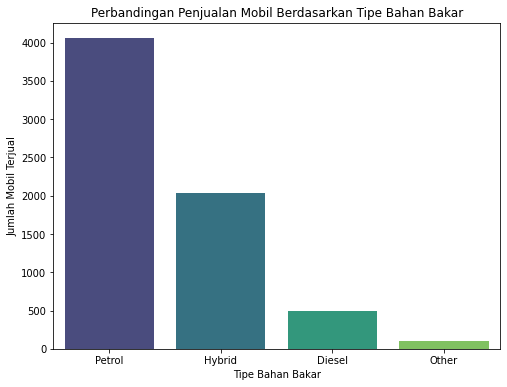

In [26]:
# Menghitung jumlah mobil terjual untuk setiap tipe bahan bakar
fuel_sales = df_no_duplicates['fuelType'].value_counts()

# Visualisasi menggunakan bar chart dengan Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=fuel_sales.index, y=fuel_sales.values, palette='viridis')
plt.title("Perbandingan Penjualan Mobil Berdasarkan Tipe Bahan Bakar")
plt.xlabel("Tipe Bahan Bakar")
plt.ylabel("Jumlah Mobil Terjual")
plt.show()

From the last 6 months' record, more than half of the used cars we sold are using petrol, followed by using hybrid. Also, we can see the number of cars sold in petrol is almost twice the number of cars sold in hybrid. Therefore, we can conclude that there is huge room to impove the sales of hybrid cars.

#### b. Comparison of the number of cars sold with Hybrid fuel

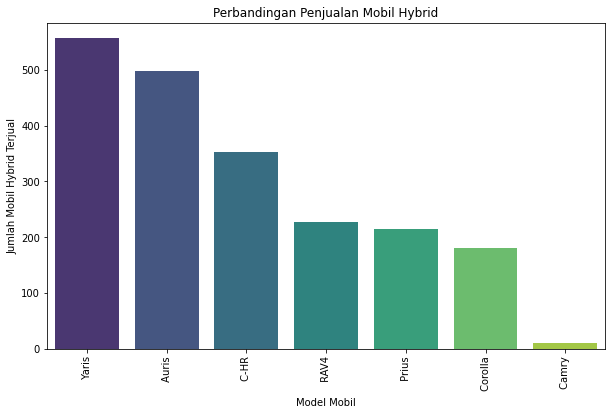

In [49]:
# Menghitung jumlah mobil terjual dengan tipe bahan bakar hybrid
hybrid_sales = df_no_duplicates[df_no_duplicates['fuelType'] == 'Hybrid']['model'].value_counts()

# Visualisasi menggunakan bar chart dengan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=hybrid_sales.index, y=hybrid_sales.values, palette='viridis')
plt.title("Perbandingan Penjualan Mobil Hybrid")
plt.xlabel("Model Mobil")
plt.ylabel("Jumlah Mobil Hybrid Terjual")
plt.xticks(rotation=90)
plt.show()

The number of cars sold only uses hybrid fuel, the best seller in car models is Yaris, followed by Auris and C-HR.

#### c. Spread of car prices for all types of fuel

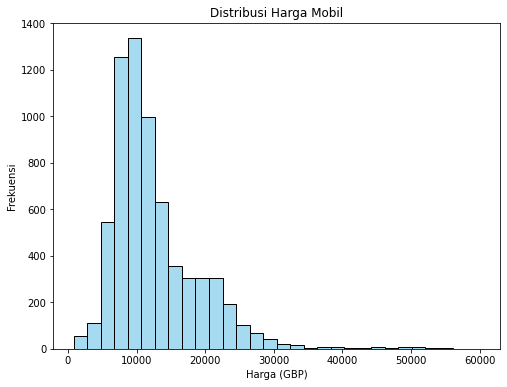

In [33]:
# distribusi price menggunakan histogram dengan Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df_no_duplicates['price'], bins=30, kde=False, color='skyblue', edgecolor='k')
plt.title("Distribusi Harga Mobil")
plt.xlabel("Harga (GBP)")
plt.ylabel("Frekuensi")
plt.show()

The histogram graph above shows the distribution of used car prices, the majority of cars are sold at a price of 30,000 GPB, cars sold above 30,000 GBP can be considered as outliers

#### d. Distribution of Car Prices for Each Type of Fuel

<Figure size 720x432 with 0 Axes>

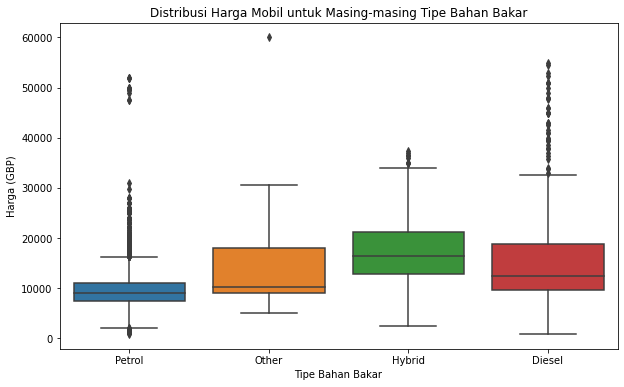

In [36]:
# Distribusi price mobil semua jenis bahan bakar
plt.figure(figsize=(10, 6))

# Visualisasi menggunakan boxplot dengan Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuelType', y='price', data=df_no_duplicates)
plt.title("Distribusi Harga Mobil untuk Masing-masing Tipe Bahan Bakar")
plt.xlabel("Tipe Bahan Bakar")
plt.ylabel("Harga (GBP)")
plt.show()

From the multiple box plot graph, it can be seen that the price of a hybrid fueled car is more expensive than its competitor petrol fueled car. 
The majority of the price of a hybrid car ranges from 13000 to 21000 GBP, while petrol cars are mainly sold from 9000 to 12000 GBP. However, we can see that there are a few hybrid fuel cars also sold at this price

### How to Make the Hybrid more Attractive?

#### a. Hybrid Car Price Distribution Based on Model

<Figure size 720x432 with 0 Axes>

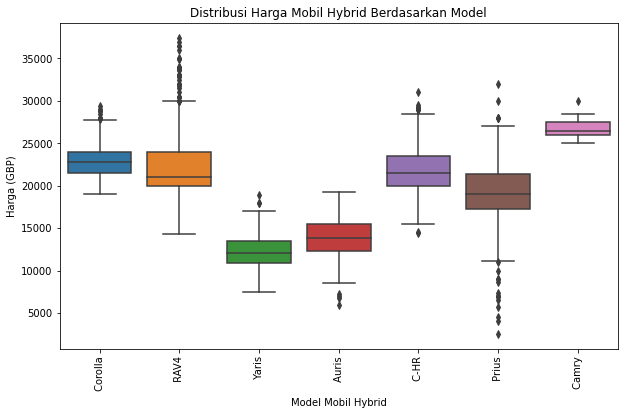

In [34]:
# Distribusi price mobil berjenis bahan bakar hybrid
plt.figure(figsize=(10, 6))

# Filter data hanya untuk mobil dengan fuelType 'Hybrid'
data_hybrid = df_no_duplicates[df_no_duplicates['fuelType'] == 'Hybrid']

# Visualisasi menggunakan boxplot dengan Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='model', y='price', data=data_hybrid)
plt.title("Distribusi Harga Mobil Hybrid Berdasarkan Model")
plt.xlabel("Model Mobil Hybrid")
plt.ylabel("Harga (GBP)")
plt.xticks(rotation=90)
plt.show()


Considering Hybrid models are more expensive on average than other types, we will find different ways to attract customers. From the various box plots below, the Prius, Yaris and Auris have sales records lower than 10,000 GBP in the last 6 months, which is able to compete with petrol cars. Therefore, for people who prioritize price, we should make these three models the main campaign car models.

#### b. Number of Cars Sold Based on Road Tax and Fuel Type

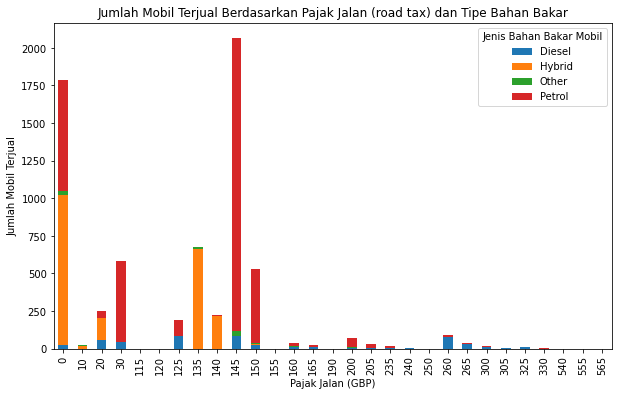

In [50]:
# Menghitung jumlah mobil terjual untuk setiap tipe bahan bakar berdasarkan pajak jalan
road_tax_sales = df_no_duplicates.groupby(['tax','fuelType']).size().unstack(fill_value=0)

# Visualisasi menggunakan bar chart
road_tax_sales.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Jumlah Mobil Terjual Berdasarkan Pajak Jalan (road tax) dan Tipe Bahan Bakar")
plt.xlabel("Pajak Jalan (GBP)")
plt.ylabel("Jumlah Mobil Terjual")
plt.legend(title="Jenis Bahan Bakar Mobil",loc = "upper right")
plt.show()


Another interesting thing is road tax, there are a large number of hybrid cars with 0 GBP road tax. where the road tax for petrol cars as the majority of its competitors is 145 GBP. therefore, we can offer customers hybrid cars with zero road tax

#### c. Number of Cars Sold for Hybrid Car Types with Zero Tax Based on Model

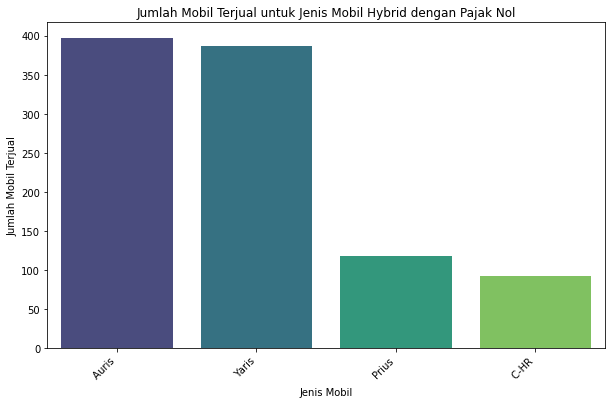

In [43]:
# Filter mobil berjenis hybrid dengan pajak nol
hybrid_tax_zero = df_no_duplicates[(df_no_duplicates['fuelType'] == 'Hybrid') & (df_no_duplicates['tax'] == 0)]

# Membuat DataFrame terkait
hybrid_tax_zero_counts = hybrid_tax_zero['model'].value_counts().reset_index()
hybrid_tax_zero_counts.columns = ['Model', 'Jumlah_Mobil_Terjual']

# Membuat plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Jumlah_Mobil_Terjual', data=hybrid_tax_zero_counts, palette='viridis')
plt.title("Jumlah Mobil Terjual untuk Jenis Mobil Hybrid dengan Pajak Nol")
plt.xlabel("Jenis Mobil")
plt.ylabel("Jumlah Mobil Terjual")
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar legible

# Menampilkan plot
plt.show()

Hybrid models with zero road tax consist of the **Auris, Yaris, Prius, C-HR** models. where these four types of cars sold 995 units, or 14.85% of all used cars sold. 

## 4. Business Metrics

Based on all the insights and our business goals, I would recommend we use **the percentage of zero-tax hybrid cars in total number of used cars sold last 6 months** as our main metric.

Based on data from the past 6 months, 14.85% of used cars sold were hybrid fuel cars with zero tax. Therefore, if this percentage increases in the next 6 months, it will be a good sign to achieve our goal.

## 5. Recommendation

To implement the campaign immediately, we need to be smart in promoting car models
hybrid on the market. Here are some strategies that can be implemented:

- Promoting road tax reduction: One of the effective steps is to convey to prospective buyers about the benefits of road tax reduction that applies to hybrid cars. With Precipitating these profits, the company can attract the attention of potential buyers who want to reduce operating costs of their car.
- Introducing More Affordable Models with 0 GPB road tax: Promotion could focus on hybrid models more affordable ones, such as the Prius, Yaris, Auris, and CH-R. By highlighting the features and benefits of this models, we can appeal to a wider market segment and provide more affordable options for aspirants buyer.
- Keep abreast of developments in the electric and hybrid car market: It is important for companies to always keep up Latest developments in the electric and hybrid car market. By collecting the latest information about trends, consumer preferences, and the latest technology, we can integrate relevant elements and pulling into the campaign. This allows our campaigns to remain in line with current market needs This.
- By combining the strategies above, hybrid car promotional campaigns will be more effective and feasible reach the target market better.
